## STA130 Homework 03 

Please see the course [wiki-textbook](https://github.com/pointOfive/stat130chat130/wiki) for the list of topics covered in this homework assignment, and a list of topics that might appear during ChatBot conversations which are "out of scope" for the purposes of this homework assignment (and hence can be safely ignored if encountered)

<details class="details-example"><summary style="color:blue"><u>Introduction</u></summary>

### Introduction
    
A reasonable characterization of STA130 Homework is that it simply defines a weekly reading comprehension assignment. 
Indeed, STA130 Homework essentially boils down to completing various understanding confirmation exercises oriented around coding and writing tasks.
However, rather than reading a textbook, STA130 Homework is based on ChatBots so students can interactively follow up to clarify questions or confusion that they may still have regarding learning objective assignments.

> Communication is a fundamental skill underlying statistics and data science, so STA130 Homework based on ChatBots helps practice effective two-way communication as part of a "realistic" dialogue activity supporting underlying conceptual understanding building. 

It will likely become increasingly tempting to rely on ChatBots to "do the work for you". But when you find yourself frustrated with a ChatBots inability to give you the results you're looking for, this is a "hint" that you've become overreliant on the ChatBots. Your objective should not be to have ChatBots "do the work for you", but to use ChatBots to help you build your understanding so you can efficiently leverage ChatBots (and other resources) to help you work more efficiently.<br><br>

</details>

<details class="details-example"><summary style="color:blue"><u>Instructions</u></summary>

### Instructions
    
1. Code and write all your answers (for both the "Pre-lecture" and "Post-lecture" HW) in a python notebook (in code and markdown cells) 
    
> It is *suggested but not mandatory* that you complete the "Pre-lecture" HW prior to the Monday LEC since (a) all HW is due at the same time; but, (b) completing some of the HW early will mean better readiness for LEC and less of a "procrastentation cruch" towards the end of the week...
    
2. Paste summaries of your ChatBot sessions (including link(s) to chat log histories if you're using ChatGPT) within your notebook
    
> Create summaries of your ChatBot sessions by using concluding prompts such as "Please provide a summary of our exchanges here so I can submit them as a record of our interactions as part of a homework assignment" or, "Please provide me with the final working verson of the code that we created together"
    
3. Save your python jupyter notebook in your own account and "repo" on [github.com](github.com) and submit a link to that notebook though Quercus for assignment marking<br><br>

</details>

<details class="details-example"><summary style="color:blue"><u>Prompt Engineering?</u></summary>
    
### Prompt Engineering? 
    
The questions (as copy-pasted prompts) are designed to initialize appropriate ChatBot conversations which can be explored in the manner of an interactive and dynamic textbook; but, it is nonetheless **strongly recommendated** that your rephrase the questions in a way that you find natural to ensure a clear understanding of the question. Given sensible prompts the represent a question well, the two primary challenges observed to arise from ChatBots are 

1. conversations going beyond the intended scope of the material addressed by the question; and, 
2. unrecoverable confusion as a result of sequential layers logial inquiry that cannot be resolved. 

In the case of the former (1), adding constraints specifying the limits of considerations of interest tends to be helpful; whereas, the latter (2) is often the result of initial prompting that leads to poor developments in navigating the material, which are likely just best resolve by a "hard reset" with a new initial approach to prompting.  Indeed, this is exactly the behavior [hardcoded into copilot](https://answers.microsoft.com/en-us/bing/forum/all/is-this-even-normal/0b6dcab3-7d6c-4373-8efe-d74158af3c00)...

</details>


### Marking Rubric (which may award partial credit) 

- [0.1 points]: All relevant ChatBot summaries [including link(s) to chat log histories if you're using ChatGPT] are reported within the notebook
- [0.2 points]: Assignment completion confirmed by visual submission for "2" 
- [0.3 points]: Evaluation of written communication for "3" 
- [0.1 points]: Correct answers for "4"
- [0.3 points]: Evidence of meaningful activity for "6"

<!-- - [0.1 points]: Assignment completion confirmed by ChatBot interaction summaries for "5" -->


### "Pre-lecture" HW [*completion prior to next LEC is suggested but not mandatory*]


#### 1. Use [_fig.add_[h/v]line()_](https://plotly.com/python/horizontal-vertical-shapes/) and [_fig.add_[h/v]rect()_](https://plotly.com/python/line-charts/) to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of `flipper_length_mm` for each `species` onto `plotly` histograms of `flipper_length_mm` for each `species` in the penguins dataset<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> - _There are several considerations in this problem..._
>     - _The histograms can be on the same figure, on separate figures, or separated into different panels in the same figure_
>     - _The elements within a figure should be well annotated, probobably using a so-called legend to help make sure annotations don't overlap each other and are clear and readible_
> - _There are several ways to approach this problem..._
>     - _You will likely be very pleased when you run the code returned to you as the result of pasting this question in as a prompt into a ChatBot session; but, you will also likely need to interact with the ChatBot to ask for adjustments to the code which give a final satisfactory figure (and this is the recommended approach to get the experience this problem intends you to have)_
>     - _**When using a ChatBot, if the code provided by your ChatBot results in an error, show the error to your ChatBot and iterate this process with the adjusted "fixed" code provided by the ChatBot... this process usually converges some something workable that's pretty close to what you were going for**_
>     - <u>**And don't forget, a ChatBot can explain what how code it provides works, if you ask it to...**</u>
>     - _You could alternatively figure out how to code this plot up for yourself by looking at the provided documentation links and perhaps using some additional google searchers or ChatBot queries to help out with specific issues or examples; and, if you end up interested in figuring out a little more how the code works that's great and definitely feel free to go ahead and do so, but at this stage the point of this problem is to understand the general ideas of figures themselves as opposed to being an expert about the code that generated them_
    
</details>


In [3]:
import seaborn as sns
import pandas as pd

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Drop rows with missing values in flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Group by species and calculate statistics
stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean', 
    median='median', 
    min_val='min', 
    max_val='max', 
    std='std', 
    q1=lambda x: x.quantile(0.25), 
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Add columns for ± 2 standard deviations
stats['mean_minus_2std'] = stats['mean'] - 2 * stats['std']
stats['mean_plus_2std'] = stats['mean'] + 2 * stats['std']

import plotly.express as px
import plotly.graph_objects as go

# Create a figure for each species
fig = go.Figure()

for species in stats['species']:
    # Filter data for the species
    species_data = penguins[penguins['species'] == species]
    
    # Add a histogram for the species
    fig.add_trace(go.Histogram(
        x=species_data['flipper_length_mm'], 
        name=species,
        opacity=0.7
    ))

    # Get species statistics
    species_stats = stats[stats['species'] == species].iloc[0]

    # Add vertical lines for mean and median
    fig.add_vline(x=species_stats['mean'], line=dict(color='blue', dash='dash'), annotation_text=f"Mean ({species})", annotation_position="top left")
    fig.add_vline(x=species_stats['median'], line=dict(color='red', dash='dot'), annotation_text=f"Median ({species})", annotation_position="top right")

    # Add rectangles for range, IQR, and ±2 standard deviations
    # Range
    fig.add_vrect(x0=species_stats['min_val'], x1=species_stats['max_val'], 
                  fillcolor="green", opacity=0.1, line_width=0, 
                  annotation_text="Range", annotation_position="top left")
    
    # IQR
    fig.add_vrect(x0=species_stats['q1'], x1=species_stats['q3'], 
                  fillcolor="yellow", opacity=0.2, line_width=0, 
                  annotation_text="IQR", annotation_position="top left")
    
    # ±2 standard deviations
    fig.add_vrect(x0=species_stats['mean_minus_2std'], x1=species_stats['mean_plus_2std'], 
                  fillcolor="purple", opacity=0.1, line_width=0, 
                  annotation_text="±2 SD", annotation_position="top left")

    fig.update_layout(
    title="Flipper Length Distributions by Penguin Species",
    barmode="overlay",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    legend_title="Species"
)

fig.show()


#### 2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using [_seaborn_ **kernel density estimation** (KDE) plots](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to produce the desired figures organized in row of three plots<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>
    
> The `seaborn` library extends `matplotlib` so [_ax.axhspan(...)_](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axhspan_demo.html#sphx-glr-gallery-subplots-axes-and-figures-axhspan-demo-py) or [_ax.fill_between(...)_](https://matplotlib.org/stable/gallery/lines_bars_and_markers/span_regions.html) from `matplotlib` could be combined with the `seaborn` KDE plot... this might be something to share with your ChatBot if it [tries to keep using _plotly_ or a KDE function rather than a _plotly_](https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/GPT/SLS/00001_gpt3p5_plotlyseaborn_plotting.md) plotting functionality...
> 
> - _When using a ChatBot, if the code provided by your ChatBot results in an error, show the error to your ChatBot and iterate this process with the adjusted "fixed" code provided by the ChatBot... this process usually converges some something workable that's pretty close to what you were going for_
> - _**Also consider the ways that you might be able to split up the instructions for the ChatBot into multiple steps, creating a sequence of additional directions and extensions along the way as you mold the figure more and more into a form increasingly matching your desired output.**_
> - And don't forget, a ChatBot can explain what how code it provides works, if you ask it to...
> 
> The technical details of the following are beyond the scope of STA130, but if you were interested, you could very briefly examine the [_seaborn_ themes](https://seaborn.pydata.org/tutorial/aesthetics.html) based on `sns.set_style()` and `sns.set_theme()` and [_colors_](https://seaborn.pydata.org/tutorial/color_palettes.html) based on the `palette` parameter, e.g.,
> 
> ```python
> sns.set_style("whitegrid") # sns.set_style("dark")
> # `sns.set_palette()` exists but functions often access and set that directly
> sns.boxplot(..., hue='column', palette="colorblind") 
> ```    
> 
> and then attempt to interact with the ChatBot to change the coloring of the figure to something that you like and looks more clear to you... 

</details>


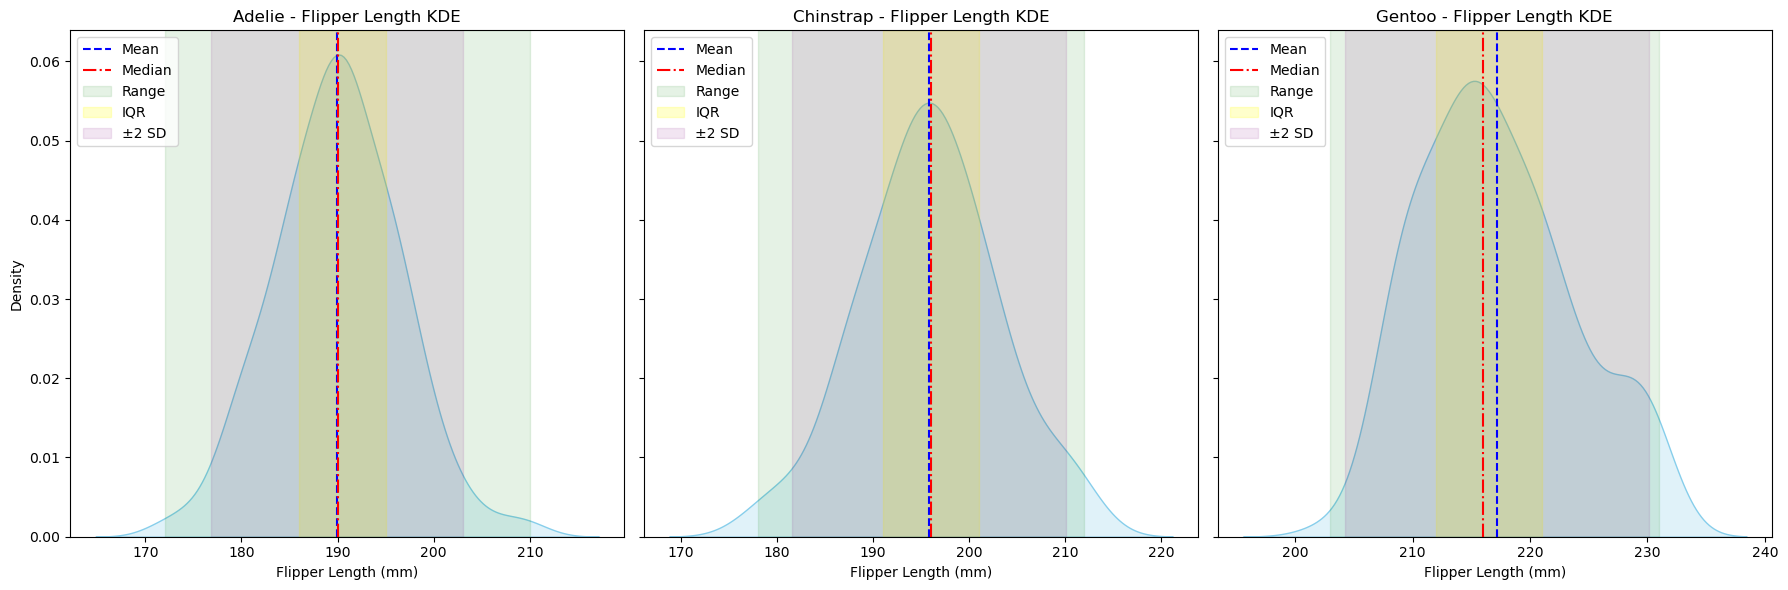

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Drop rows with missing values in flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Group by species and calculate statistics
stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean', 
    median='median', 
    min_val='min', 
    max_val='max', 
    std='std', 
    q1=lambda x: x.quantile(0.25), 
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Add columns for ± 2 standard deviations
stats['mean_minus_2std'] = stats['mean'] - 2 * stats['std']
stats['mean_plus_2std'] = stats['mean'] + 2 * stats['std']

import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots (one row, three columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Loop through each species and corresponding axis
for ax, species in zip(axes, stats['species']):
    # Filter data for the species
    species_data = penguins[penguins['species'] == species]
    
    # Plot the KDE for the species
    sns.kdeplot(species_data['flipper_length_mm'], ax=ax, fill=True, color='skyblue')
    
    # Get species statistics
    species_stats = stats[stats['species'] == species].iloc[0]

    # Add vertical lines for mean and median
    ax.axvline(species_stats['mean'], color='blue', linestyle='--', label='Mean')
    ax.axvline(species_stats['median'], color='red', linestyle='-.', label='Median')

    # Add shaded regions for range, IQR, and ±2 standard deviations
    # Range
    ax.axvspan(species_stats['min_val'], species_stats['max_val'], color='green', alpha=0.1, label='Range')

    # IQR
    ax.axvspan(species_stats['q1'], species_stats['q3'], color='yellow', alpha=0.2, label='IQR')
    
    # ±2 standard deviations
    ax.axvspan(species_stats['mean_minus_2std'], species_stats['mean_plus_2std'], color='purple', alpha=0.1, label='±2 SD')

    # Customize the plot for each species
    ax.set_title(f'{species} - Flipper Length KDE')
    ax.set_xlabel('Flipper Length (mm)')
    ax.legend(loc='upper left')

# Set common y-axis label
axes[0].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


<Axes: xlabel='species', ylabel='flipper_length_mm'>

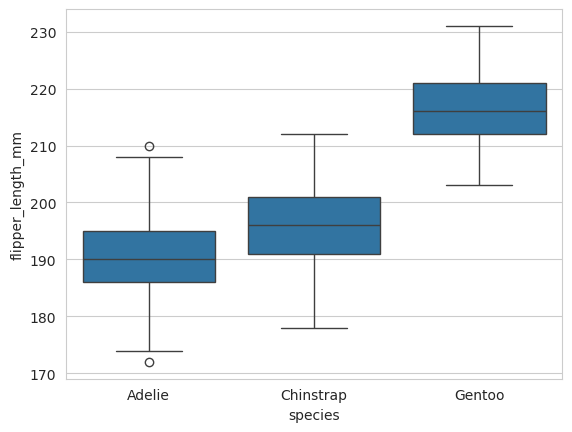

In [5]:
# Set the style to "whitegrid"
sns.set_style("whitegrid")

# Create a plot
sns.boxplot(x="species", y="flipper_length_mm", data=penguins)


<Axes: xlabel='species', ylabel='flipper_length_mm'>

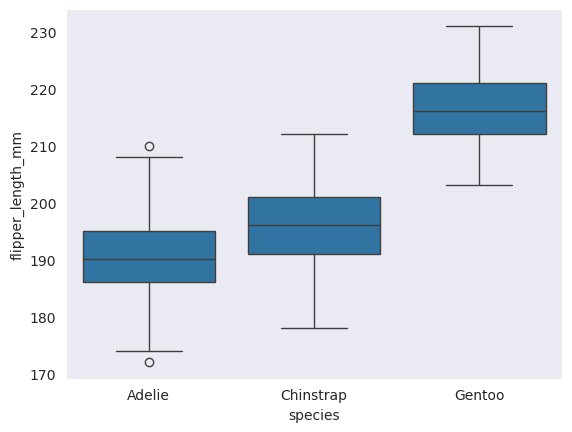

In [6]:
# Set the style to "dark"
sns.set_style("dark")

# Create a plot
sns.boxplot(x="species", y="flipper_length_mm", data=penguins)


<Axes: xlabel='species', ylabel='flipper_length_mm'>

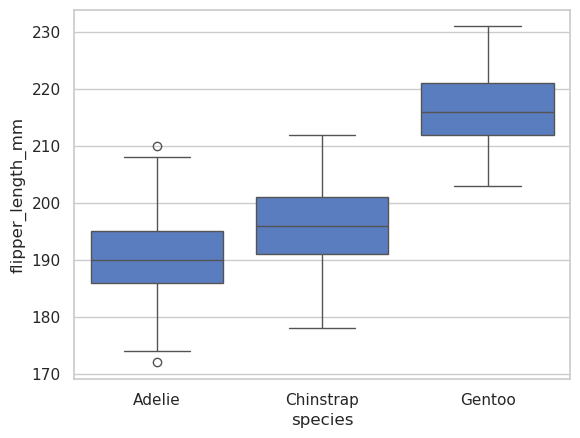

In [7]:
# Set a theme with "whitegrid" style, "notebook" context, and a custom color palette
sns.set_theme(style="whitegrid", palette="muted", context="notebook")

# Create a plot
sns.boxplot(x="species", y="flipper_length_mm", data=penguins)


<Axes: xlabel='species', ylabel='flipper_length_mm'>

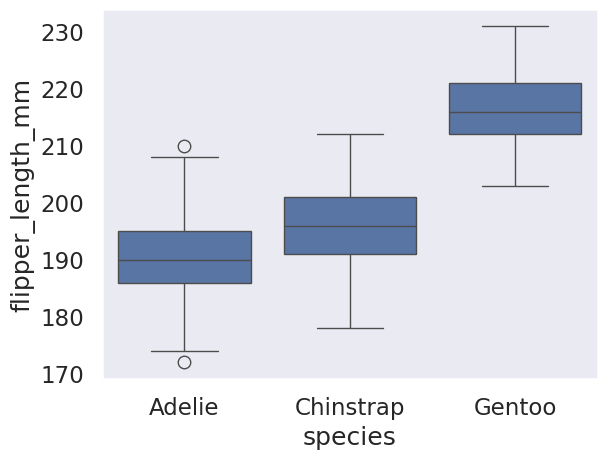

In [8]:
# Set a dark theme with larger elements suitable for presentations
sns.set_theme(style="dark", context="talk", palette="deep")

# Create a plot
sns.boxplot(x="species", y="flipper_length_mm", data=penguins)


/tmp/ipykernel_52/428396880.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='species', ylabel='flipper_length_mm'>

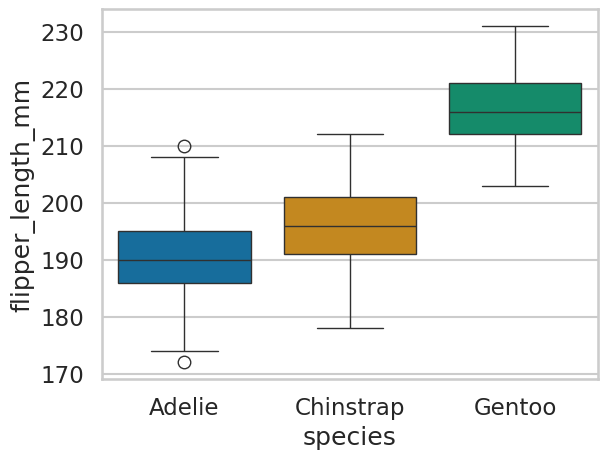

In [9]:
# Using the "colorblind" palette for categorical data
sns.set_style("whitegrid")
sns.boxplot(x="species", y="flipper_length_mm", data=penguins, palette="colorblind")


<Axes: xlabel='flipper_length_mm', ylabel='Density'>

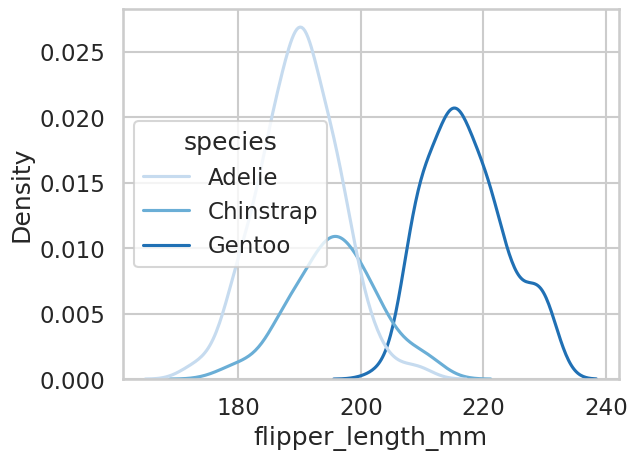

In [10]:
# Using a sequential palette for continuous data
sns.kdeplot(x="flipper_length_mm", data=penguins, hue="species", palette="Blues")


/tmp/ipykernel_52/3772840673.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='species', ylabel='flipper_length_mm'>

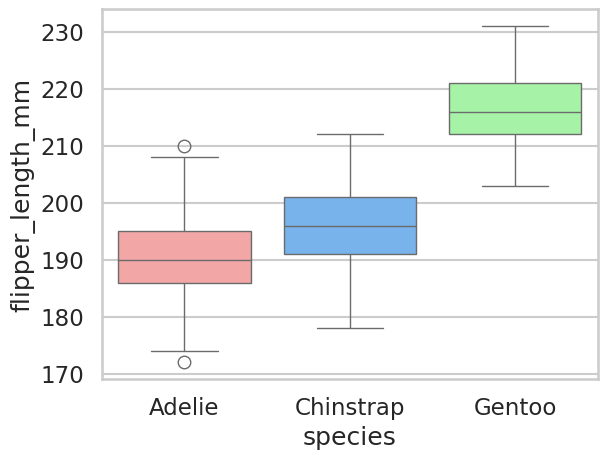

In [11]:
# Define a custom palette
custom_palette = sns.color_palette(["#ff9999", "#66b3ff", "#99ff99"])

# Apply the custom palette
sns.boxplot(x="species", y="flipper_length_mm", data=penguins, palette=custom_palette)


#### 3. Search online for some images of **box plots**, **histograms**, and **kernel density estimators** (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> This 
> 
> The details of the ["kernel"](https://en.wikipedia.org/wiki/Kernel_density_estimation) and how it works in [kernel density estimation](https://plotly.com/python/violin/#split-violin-plot) are beyond the scope of STA130; but, there is typically a so-called "bandwidth" **argument** (e.g., `bw_adjust` in [_seaborn_](https://stackoverflow.com/questions/37932283/confusion-with-bandwidth-on-seaborns-kdeplot)) that "controls the width of the kernel" which is analgous to the "number of bins parameter" of a histogram (e.g., `nbins` in [_plotly_](https://www.google.com/search?client=safari&rls=en&q=plotly+nbins&ie=UTF-8&oe=UTF-8))  <!-- 4. Report on your preferences between `plotly` and `seaborn` in terms of usability and the general visual aestetics -->
> 
> _Don't forget to ask for summaries of your ChatBot session(s) and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatGPT)_
    
</details>

I prefer histograms for their simplicity, direct frequency representation, and flexibility in adjusting bin sizes, which makes them more intuitive and informative for initial data exploration compared to KDEs or box plots.

#### 4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions

1. Which datasets have similar means and similar variances
2. Which datasets have similar means but quite different variances
3. Which datasets have similar variances but quite different means
4. Which datasets have quite different means and quite different variances
    
<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>
    
> Can you answer these questions immediately? If not, first review what the basic ideas of **sample means** and **sample standard deviations** (and **sample variances**) are. Their mathematical definitions are given below, and are useful for understanding the intuition of these concepts in terms of "averages" of things, like "observations" or "squared differences" (and then perhaps square-rooted). But there are other ways to "intuitively visually" understand **sample means** and **sample standard deviations** (and **sample variances**) which a ChatBot would be able to discuss with you.
>
> - sample mean $\displaystyle \bar x = \frac{1}{n}\sum_{i=1}^n x_i$ 
> - sample variance $\displaystyle s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i-\bar x)^2$
> - sample standard deviation $\displaystyle s = \sqrt{s^2}$
>
> It's potentially maybe possible that you or a ChatBot could answer these questions by looking at the code that produced the data you're considering. But if you're trying to check and understand things that way, you should instead consider just calculate the statistics that answer the questions themselves...
> - `np.mean(df.col)` or `df.col.mean()`
> - `np.std(df.col, dof=1)` / `np.var(df.col, dof=1)` or `df.col.std(dof=1)` / `df.col.var(dof=1)`
>
> _If you are resorting to calculating the statistics that answer the questions, try to understand the answers after you have them... just getting the "right" answers kind of defeats the point of this exercise..._
>
> - The difference between trying to answer this question using the code that produced the data versus calculating the statistics from the data comes down to the difference between **parameters** and **statistics**, but this will be discussed in the lecture... in the meantime, howevever, if you're curious about this... you could consider prompting a ChatBot to explain the difference between **parameters** and **statistics**...
>     - ... this would naturally lead to some discussion of the relationship between **populations** and **samples**, and from there it would only be a little further to start working to understand the relationship between **statistics** and **parameters** and how they connect to *populations* and *samples* (and hence each other)...    
    
</details>  

from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [4]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n=1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(1.5, 0.25, size=n), stats.norm.rvs(8.75, 0.33, size=1000)]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=50, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=20, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=400, width=1200, title_text="Row of Histograms")
fig.update_xaxes(range=[0, 10])

fig.show()


Which datasets have similar means and similar variances? B and D
Which datasets have similar means but quite different variances? B and A
Which datasets have similar variances but quite different means? B and D
Which datasets have quite different means and quite different variances? A and C

<details class="details-example"><summary style="color:blue"><u>Continue now...?</u></summary>

### Pre-lecture VS Post-lecture HW

Feel free to work on the "Post-lecture" HW below if you're making good progress and want to continue: the next questions will just continue working on data visualization related topics, so, it's just a choice whether or not you want to work a head a little bit... 

- The previous suggestions regarding **parameters** versus **statistics** would be a very good thing to look at carefully in preparation for the upcoming lecture...
    
*The benefits of continue would are that (a) it might be fun to try to tackle the challenge of working through some problems without additional preparation or guidance; and (b) this is a very valable skill to be comfortable with; and (c) it will let you build experience interacting with ChatBots (and beginning to understand their strengths and limitations in this regard)... it's good to have sense of when using a ChatBot is the best way to figure something out, or if another approach (such as course provided resources or a plain old websearch for the right resourse) would be more effective*
    
</details> 



### "Post-lecture" HW [*submission along with "Pre-lecture" HW is due prior to next TUT*]

#### 5. Start a new ChatBot session to explore the general relationship between the *mean* and *median* and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the *mean* and *median* and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.<br>

```python
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
```

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>
    
> You could start this session perhaps something like [this](https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/GPT/SLS/00003_GPT3p5_meanVmedian.md)?
> 
> _Don't forget to ask for summaries of your ChatBot session(s) and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatGPT)..._

</details> 



#### 6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data<br>

1. Your approach should likely follow what was suggested for the **Week 02 TUT Communication Activity from TUT**
2. In the **Week 03 TUT Communication Activity from TUT** you will be put in groups and determine which group members dataset introduction will be presented by the group

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> A good place to browse datasets is [TidyTuesday](https://github.com/rfordatascience/tidytuesday/blob/master/README.md) as working with ChatBots to find unconventional and entertaining datasets is not particularly productive and only seems to end up with the datasets seen here and other (more interesting?) suggestions like [iris](https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv), [superheros](https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv), [hauntings](https://raw.githubusercontent.com/andreamoleri/Hauntings/main/hauntings.csv), [bigfoot](https://raw.githubusercontent.com/hannahramirez/BigfootVsUfos/main/bigfoot_mod.csv), [ufos](https://raw.githubusercontent.com/hannahramirez/BigfootVsUfos/main/ufo_mod.csv), [sharks](https://raw.githubusercontent.com/IbaiGallego/DataCleaning_SharkAttack/main/data/jaws.csv), [legos](https://raw.githubusercontent.com/seankross/lego/master/data-tidy/legosets.csv), [bees](https://gist.githubusercontent.com/bootshine2/ba15d3cb38e2ed31129aeca403405a12/raw/10949901cd8a6a75aa46c86b804c42ff410f929e/Bee%2520Colony%2520Loss.csv), [housing](https://raw.githubusercontent.com/slavaspirin/Toronto-housing-price-prediction/master/houses_edited.csv), and [gapminder](https://raw.githubusercontent.com/kirenz/datasets/master/gapminder.csv)
> ```python
> # Maybe something like this? Feel free to use this one 
> # if it strikes your fancy after look around a bit
> import pandas as pd
> df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
> df # df.columns
> ```

</details>

#### 7. Watch the classic [Gapminder Video](https://www.youtube.com/watch?v=jbkSRLYSojo), then have a look at the [_plotly_ version](https://plotly.com/python/animations/) and recreate the animation (perhaps after optionally exploring and changing the [style](https://plotly.com/python/templates/), if you wish)

#### 8. Provide a second version of the figure from the previous problem where you edit the `fig = px.scatter()` function from the Gapminder code so that `x` is "percent change", `y` is "rank", `size` is "percent", and `color`="sex", `animation_frame` is "year", and `animation_group` and `hover_name` are "name". Then use `size_max=50`, `range_x=[-0.005,0.005])` and remove the `log_x=True` and `range_y` parameters

> ```python
> bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
> bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
> bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
> bn = bn.sort_values(['name','year'])
> # the next three lines create the increaes or decrease in name prevalence from the last year 
> bn['percent change'] = bn['percent'].diff()
> new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
> bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
> bn = bn.sort_values('year')
> bn = bn[bn.percent>0.001] # restrict to "common" names
> fig = px.scatter(bn, x="", y="", animation_frame="", animation_group="",
>                  size="", color="", hover_name="",size_max=50, range_x=[-0.005,0.005]) # range_y removed
> fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
> fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
> ```


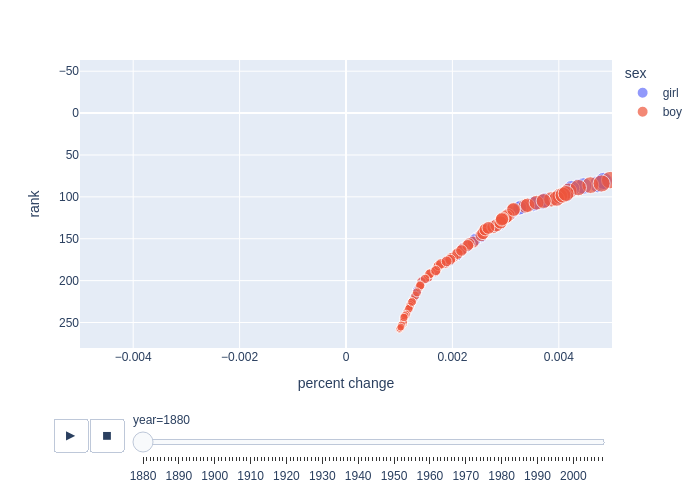

In [3]:
import pandas as pd
import plotly.express as px

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

bn['name'] = bn['name'] + " " + bn['sex']

bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

bn = bn.sort_values(['name', 'year'])

bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

bn = bn.sort_values('year')

bn = bn[bn['percent'] > 0.001]

fig = px.scatter(bn, 
                 x="percent change", 
                 y="rank", 
                 animation_frame="year", 
                 animation_group="name", 
                 size="percent", 
                 color="sex", 
                 hover_name="name", 
                 size_max=50, 
                 range_x=[-0.005, 0.005])

fig.update_yaxes(autorange='reversed')

fig.show(renderer="png")


#### 9. Have you reviewed the course [wiki-textbook](https://github.com/pointOfive/stat130chat130/wiki) and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br><br>
  
<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>
    
> _Just answering "Yes" or "No" or "Somewhat" or "Mostly" or whatever here is fine as this question isn't a part of the rubric; but, the midterm and final exams may ask questions that are based on the tutorial and lecture materials; and, your own skills will be limited by your familiarity with these materials (which will determine your ability to actually do actual things effectively with these skills... like the course project...)_
    
</details>

Mostly

https://chatgpt.com/share/66f286b3-4a08-8008-81fe-ea65e24c35d1

# Recommended Additional Useful Activities [Optional]

The "Ethical Profesionalism Considerations" and "Current Course Project Capability Level" sections below **are not a part of the required homework assignment**; rather, they are regular weekly guides covering (a) relevant considerations regarding professional and ethical conduct, and (b) the analysis steps for the STA130 course project that are feasible at the current stage of the course

<br><details class="details-example"><summary style="color:blue"><u>Ethical Professionalism Considerations</u></summary>

### Ethical Professionalism Considerations

|![](https://handsondataviz.org/images/14-detect/gdp-baseline-merged-annotated.png)|
|-|
| |

Mark Twain's statment that, "There are lies, damn lies, and statistics", reflects a general skepticism towards statistical analysis that has been reinforced through through popular books such as [How to Lie with Statistics](https://en.wikipedia.org/wiki/How_to_Lie_with_Statistics). One place "statistics" can be used to decieve is through misuse of charts.  As discussed [here](https://handsondataviz.org/how-to-lie-with-charts.html) and many other places, a primary tactic that can be used to give a misleading impression using a chart is the manipulation of axes or the addition of additional dimensions which distort the meaning of size. **What are the problems with the following graphs?**

|![](https://images.ctfassets.net/jicu8fwm4fvs/260tj0wxTFCAlbf4yTzSoy/2b002a49921831ab0dc05415616a1652/blog-misleading-gun-deaths-graph.jpeg)|![](https://photos1.blogger.com/blogger/5757/110/1600/macgraph.jpg)|
|-|-|
| | |

</details>    

<details class="details-example"><summary style="color:blue"><u>Current Course Project Capability Level</u></summary>
   
### Current Course Project Capability Level
    
**Remember to abide by the [data use agreement](https://static1.squarespace.com/static/60283c2e174c122f8ebe0f39/t/6239c284d610f76fed5a2e69/1647952517436/Data+Use+Agreement+for+the+Canadian+Social+Connection+Survey.pdf) at all times.**

Information about the course project is available on the course github repo [here](https://github.com/pointOfive/stat130chat130/tree/main/CP), including a draft [course project specfication](https://github.com/pointOfive/stat130chat130/blob/main/CP/STA130F23_course_project_specification.ipynb) (subject to change). 
- The Week 01 HW introduced [STA130F24_CourseProject.ipynb](https://github.com/pointOfive/stat130chat130/blob/main/CP/STA130F24_CourseProject.ipynb), and the [available variables](https://drive.google.com/file/d/1ISVymGn-WR1lcRs4psIym2N3or5onNBi/view). 
- Please do not download the [data](https://drive.google.com/file/d/1mbUQlMTrNYA7Ly5eImVRBn16Ehy9Lggo/view) accessible at the bottom of the [CSCS](https://casch.org/cscs) webpage (or the course github repo) multiple times.
    
At this point in the course you should be able to create a `for` loop to iterate through and provide **visualizations** of some of the interesting columns in the course project data

1. Create a `for` loop with a **conditional logic structure** that appropriately controls the kind of visualization that gets made for a given column of data based on its data type

*Being able run your code with different subsets (of different types) of columns demonstrates the desirability of the programming design principle of "polymorphism" (which means "many uses") which states that code is best when it's "resuable" for different purposes... such as automatically providing the appropriate visualizations as interest in different variables dynamically changes...* 
    
</details>            